<a href="https://colab.research.google.com/github/Chamika36/Superstore-Sales-Analysis/blob/main/Superstore_Sales_Data_Analytics_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore Sales Data Analytics Report
**Domain:** Retail / E-commerce  
**Objective:** Optimizing Regional Profitability and Discount Strategy

Loading the dataset

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')

# Display the first few rows to verify
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Data Preprocessing

In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Fill missing postal codes and set as integer
df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)

# Convert date columns to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create Profit Margin feature
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Encode categorical features for statistical modeling
le = LabelEncoder()
for col in ['Segment', 'Region', 'Category', 'Ship Mode']:
    df[f'{col}_Encoded'] = le.fit_transform(df[col])

# Check cleaned data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Segment_Encoded,Region_Encoded,Category_Encoded,Ship Mode_Encoded
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,0,2,0,2
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,0,2,0,2
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,1,3,1,2
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,0,2,0,3
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,0,2,1,3


In [ ]:
EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Dataset Information ---")
df.info()

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Summary Statistics ---")
print(df[['Sales', 'Quantity', 'Discount', 'Profit']].describe())

# Mean, Median, and Mode for Profit
print(f"\nMean Profit: {df['Profit'].mean()}")
print(f"Median Profit: {df['Profit'].median()}")
print(f"Mode Profit: {df['Profit'].mode().iloc[0]}")

#Range, Variance, and Std Dev for Sales
range_sales = df['Sales'].max() - df['Sales'].min()
print(f"\nRange of Sales: {range_sales}")
print(f"Variance of Sales: {df['Sales'].var()}")
print(f"Standard Deviation of Sales: {df['Sales'].std()}")

# Correlation matrix
print("\n--- Correlation Matrix ---")
correlation_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
print(correlation_matrix)

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Order Date         9994 non-null   datetime64[ns]
 3   Ship Date          9994 non-null   datetime64[ns]
 4   Ship Mode          9994 non-null   object        
 5   Customer ID        9994 non-null   object        
 6   Customer Name      9994 non-null   object        
 7   Segment            9994 non-null   object        
 8   Country            9994 non-null   object        
 9   City               9994 non-null   object        
 10  State              9994 non-null   object        
 11  Postal Code        9994 non-null   int64         
 12  Region             9994 non-null   object        
 13  Product ID         9994 non-null   

Static Analysis (Seaborn & Matplotlib)

/tmp/ipython-input-3892627833.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_cat_profit.index, y=sub_cat_profit.values, palette='coolwarm')


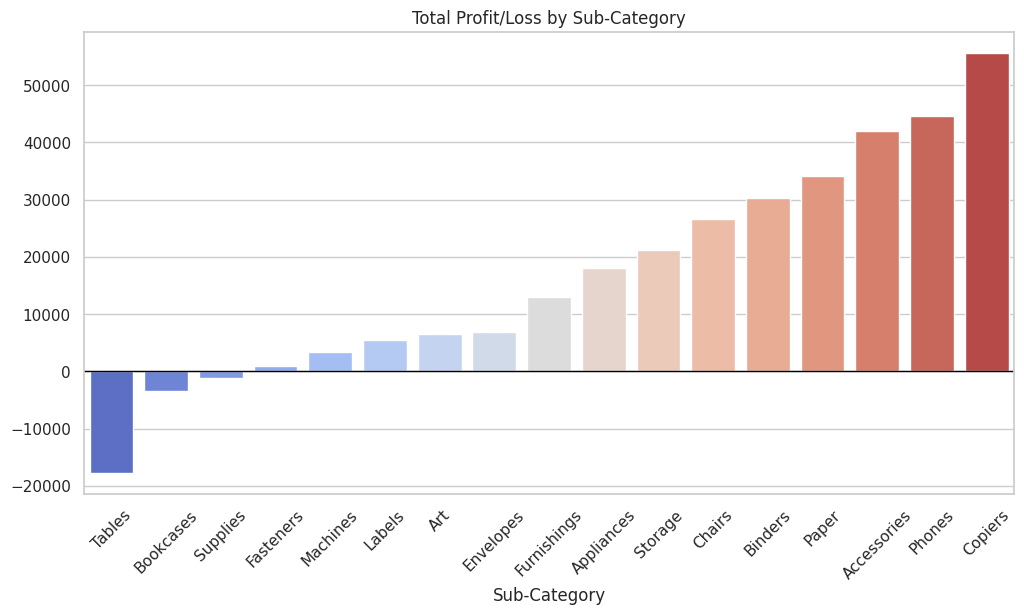

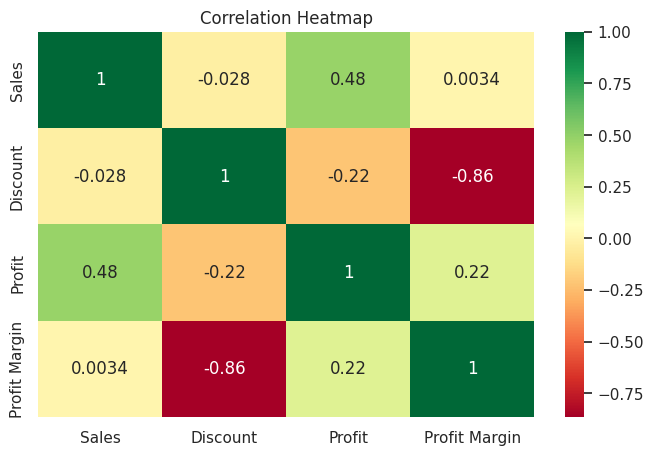

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

# Plot profit by Sub-Category
plt.figure(figsize=(12, 6))
sub_cat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
sns.barplot(x=sub_cat_profit.index, y=sub_cat_profit.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=1)
plt.title('Total Profit/Loss by Sub-Category')
plt.show()

# Financial correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Sales', 'Discount', 'Profit', 'Profit Margin']].corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

Interactive Map (Plotly)

In [7]:
import plotly.express as px

# Aggregate profit by State
state_profit = df.groupby('State')['Profit'].sum().reset_index()

# Create interactive US Profit Map
fig = px.choropleth(state_profit,
                    locations='State',
                    locationmode="USA-states",
                    color='Profit',
                    color_continuous_scale="RdYlGn",
                    scope="usa",
                    title='Total Profit by State')
fig.show()

Correlation between Discount and Profit: -0.2195
Regression Coefficients: [   0.25431358 -209.74004461]
Model R^2 Score: -0.7037


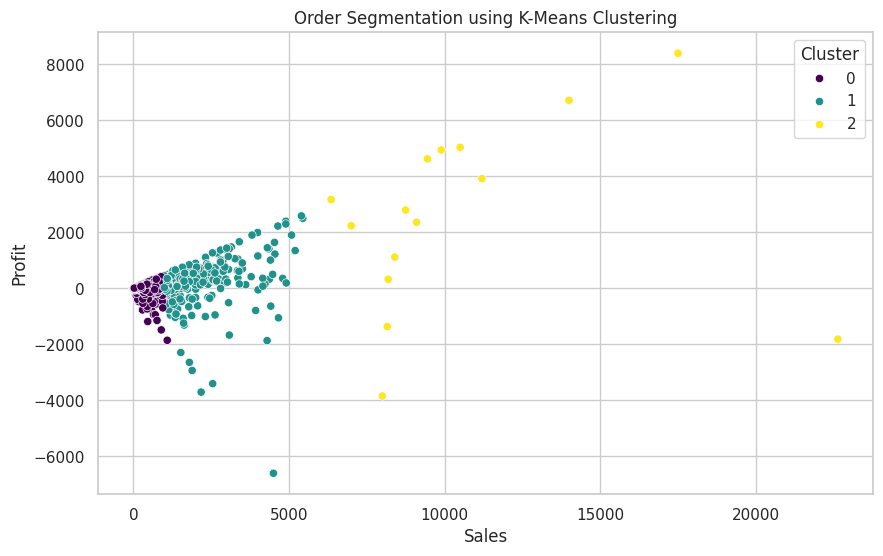

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# --- CORRELATION ANALYSIS ---
# Test the strength of the relationship between Discount and Profit
discount_profit_corr = df['Discount'].corr(df['Profit'])
print(f"Correlation between Discount and Profit: {discount_profit_corr:.4f}")

# --- LINEAR REGRESSION ---
# Predict Profit based on Sales and Discount levels
X = df[['Sales', 'Discount']]
y = df['Profit']

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Regression Coefficients: {model.coef_}")
print(f"Model R^2 Score: {model.score(X_test, y_test):.4f}")

# --- K-MEANS CLUSTERING ---
# Segment transactions into 3 groups based on Sales and Profit
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Sales', 'Profit']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Cluster', palette='viridis')
plt.title('Order Segmentation using K-Means Clustering')
plt.show()